In [3]:
## IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# f score 
from sklearn.metrics import f1_score
import seaborn as sns

In [27]:
## CREATE DUMMY DATA 

data_X, class_label = make_classification(n_samples = 1000, n_features = 5, n_classes = 2) # generates a random n-class classification problem
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3) # creates training and test sets
print(data_X)

## CREATE DESCISION TREE

model = DecisionTreeClassifier() 
model.fit(trainX, trainy)


## CREATE NEW PREDICTIONS

predictions = model.predict_proba(testX)[:, 1] 


[[ 0.83244816 -1.18137214  1.584369   -1.21444268  1.16182684]
 [ 1.20776369  1.14527196  0.09109635  1.00589049  1.60424363]
 [ 0.95107558  1.18347975 -0.14569424  1.12014444  1.25527357]
 ...
 [ 0.7644669  -1.06143501  1.43686865  1.23615996  1.06627918]
 [-1.20167886  0.76230589 -1.55899093 -1.57319056 -1.65030446]
 [ 0.32464466 -1.38006079  1.32769146 -0.1855612   0.47927132]]


118
18
145
19


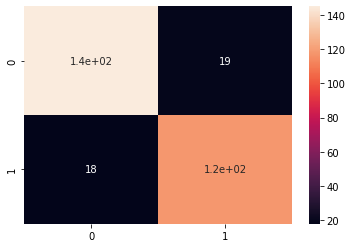

In [22]:
################# TASK 1 #################

## CALCULATE ACCURACY
accuracy = accuracy_score(testy , predictions)


## CREATE CONFUSION MATRIX
CM = confusion_matrix(testy , predictions)
sns.heatmap(pd.DataFrame(CM), annot=True)

TN, FP, FN, TP = CM.ravel() # students do not need to do this, but good for you to have if they ask
print(TP)
print(FN)
print(TN)
print(FP)


In [19]:
################# TASK 2 #################

## CALCUATE PRECISION, RECALL AND SPECIFICITY
precision = TP/(TP+FP)
recall = TP/(TP+FN) 
specificity = TN/(TN+FP)

AUC: 0.843493


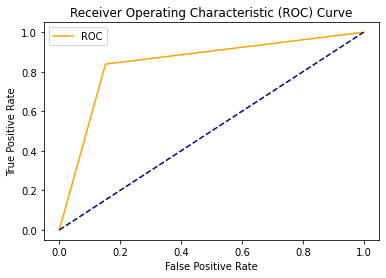

In [7]:
################# TASK 3 #################

## CALCULATE AUC

auc = roc_auc_score(testy, predictions)
print('AUC: %f' %auc)


## PLOT ROC CURVE

fpr, tpr = roc_curve(testy, predictions)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [8]:
################# TASK 4 #################

## CALCULATE F SCORE 

fscore = f1_score(testy, predictions)
print('F Score: %f' %fscore)

F Score: 0.846906


AUC: 0.875897
118
19
145
18
0.8613138686131386
0.8676470588235294
0.8841463414634146


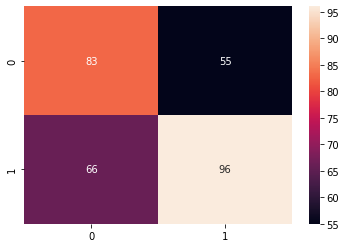

In [24]:
################# TASK 5 #################

data_X_mod2, class_label_mod2 = make_classification(n_samples = 1000, n_features = 5, n_classes = 2, flip_y = 0.5) 
trainX_mod2, testX_mod2, trainy_mod2, testy_mod2 = train_test_split(data_X_mod2, class_label_mod2, test_size=0.3)

model_mod2 = DecisionTreeClassifier() 
model_mod2.fit(trainX_mod2, trainy_mod2)

predictions_mod2 = model_mod2.predict_proba(testX_mod2)[:, 1] 

accuracy_score(testy_mod2,predictions_mod2)

CM_mod2 = confusion_matrix(testy_mod2 , predictions_mod2)
sns.heatmap(pd.DataFrame(CM_mod2), annot=True)

auc_mod2 = roc_auc_score(testy, predictions)
print('AUC: %f' %auc_mod2)

precision = TP/(TP+FP)
recall = TP/(TP+FN) 
specificity = TN/(TN+FP)
print(TP)
print(FP)
print(TN)
print(FN)
print(precision)
print(recall)
print(specificity)


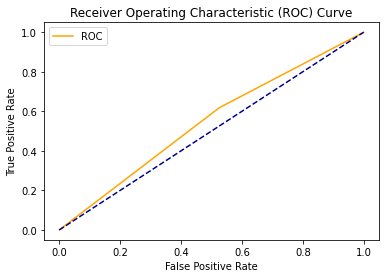

In [13]:
fpr_mod2, tpr_mod2 = roc_curve(testy_mod2, predictions_mod2)[0:2]
plt.plot(fpr_mod2, tpr_mod2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [15]:
fscore_mod2 = f1_score(testy_mod2, predictions_mod2)
print('F Score: %f' %fscore_mod2)

F Score: 0.668942
